<a href="https://colab.research.google.com/github/Apsarasky/apsara/blob/main/Internship%20task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### #load the Iris dataset(high-dimensional dataset)


In [ ]:
iris_data=load_iris()
df=pd.DataFrame(iris_data.data,columns=iris_data.feature_names)



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/iris_data.csv')


### #display first few rows


In [ ]:
print("Dataset Sample:")
print(df.head())



Dataset Sample:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


### #check dataset dimensions


In [ ]:
print("\nDataset Dimensions:",df.shape)



Dataset Dimensions: (150, 5)


### #apply PCA to reduce dataset from 4D to 2D


In [ ]:
pca=PCA(n_components=2)
df_pca=pca.fit_transform(df)



### #convert to DataFrame for visualization


In [ ]:
df_pca=pd.DataFrame(df_pca,columns=['PC1','PC2'])
df_pca['Target']=iris_data.target #add labels

print("\nReduced Dataset:")
print(df_pca.head())




Reduced Dataset:
        PC1       PC2  Target
0 -2.865415  0.296295       0
1 -2.892047 -0.183785       0
2 -3.054980 -0.174827       0
3 -2.920230 -0.331582       0
4 -2.906852  0.295917       0


### #plot PCA_transformed data


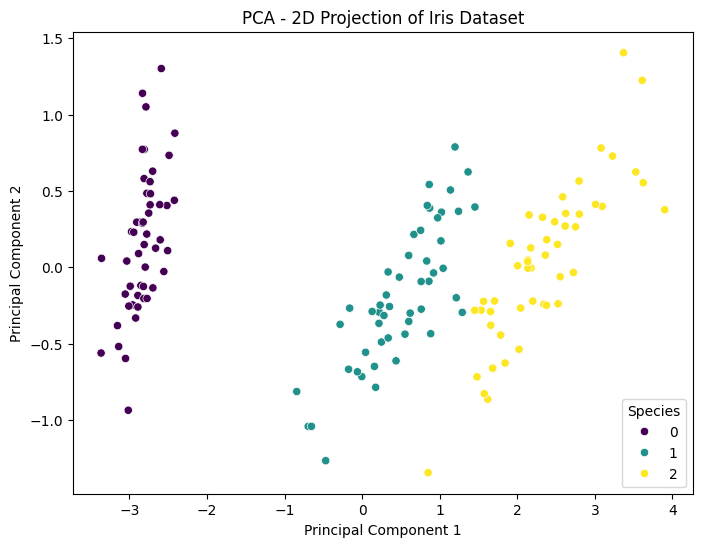

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_pca['PC1'],y=df_pca['PC2'],hue=df_pca['Target'],palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2D Projection of Iris Dataset')
plt.legend(title="Species")
plt.show()

### #task 7 part 2


In [33]:
#install necessary libraries if not already installed
#!pip install statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA



In [34]:
df=pd.read_csv("/content/drive/MyDrive/stock_prices.csv",parse_dates=['Date'],index_col='Date')
df.index = pd.to_datetime(df.index)
df = df.asfreq('D')



In [35]:
print("Stock Data Sample:")
print(df.head())



Stock Data Sample:
              Open   Close  Volume
Date                              
2023-01-01  120.35  140.85    1315
2023-01-02  174.88  155.78    2576
2023-01-03  144.57  142.63    2610
2023-01-04  174.18  170.44    3389
2023-01-05  141.30  161.30    2047


In [36]:
print("\nMissing Values:")
print(df.isnull().sum())




Missing Values:
Open      0
Close     0
Volume    0
dtype: int64


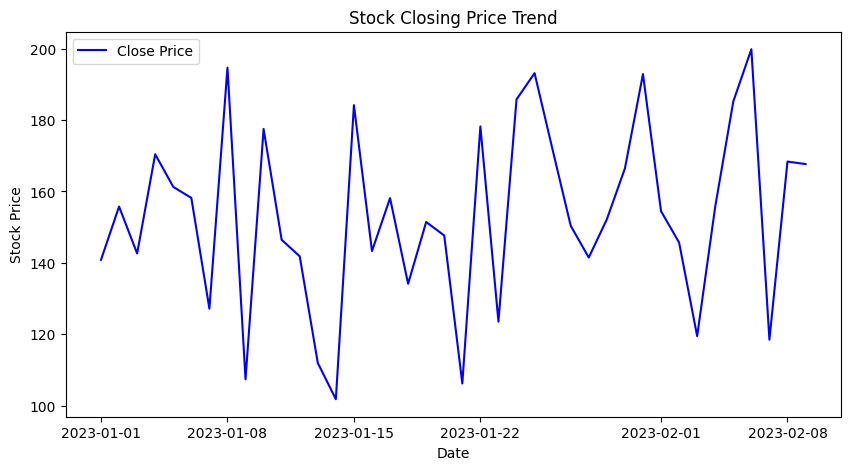

In [37]:
plt.figure(figsize=(10,5))
plt.plot(df.index,df['Close'],label="Close Price",color='blue')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Closing Price Trend")
plt.legend()
plt.show()

df['Prev_Close']=df['Close'].shift(1)



In [38]:
df.dropna(inplace=True)

print("\nDataset with Lag Features:")
print(df.head())



Dataset with Lag Features:
              Open   Close  Volume  Prev_Close
Date                                          
2023-01-02  174.88  155.78    2576      140.85
2023-01-03  144.57  142.63    2610      155.78
2023-01-04  174.18  170.44    3389      142.63
2023-01-05  141.30  161.30    2047      170.44
2023-01-06  132.02  158.21    3764      161.30


In [39]:
model=ARIMA(df['Close'],order=(1,1,0))
model_fit=model.fit()




Forecasted Prices:
2023-02-10    168.097116
2023-02-11    167.860340
2023-02-12    167.998047
2023-02-13    167.917957
2023-02-14    167.964537
2023-02-15    167.937447
2023-02-16    167.953202
2023-02-17    167.944039
2023-02-18    167.949368
2023-02-19    167.946269
Freq: D, Name: predicted_mean, dtype: float64


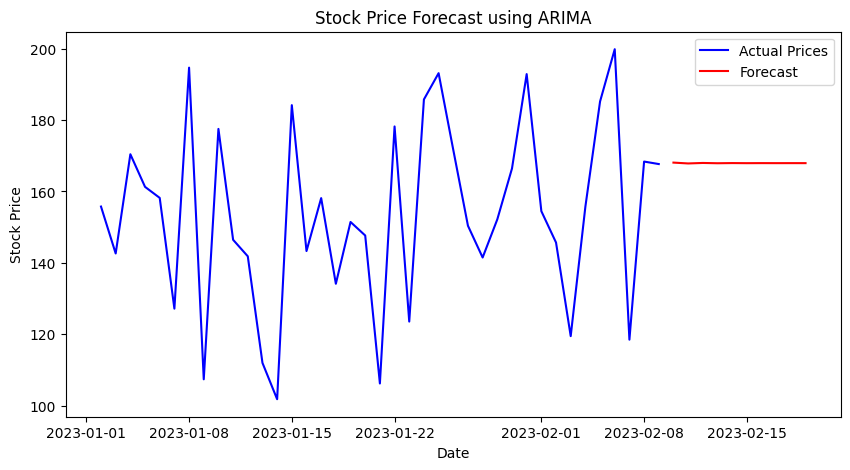

In [40]:
forecast=model_fit.forecast(steps=10)
print("\nForecasted Prices:")
print(forecast)

plt.figure(figsize=(10,5))
plt.plot(df.index,df['Close'],label="Actual Prices",color='blue')
plt.plot(pd.date_range(start=df.index[-1],periods=11,freq='D')[1:],forecast,label="Forecast",color='red')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price Forecast using ARIMA")
plt.legend()
plt.show()